In [1]:
!pip3 install seqeval

     |████████████████████████████████| 51kB 4.1MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16184 sha256=57c42d5157e93428c74c4b34c5c8b6b0ffefa8309944c41c83d717995f909083
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [2]:
pip install tensorflow

In [3]:
 import pandas as pd
annotations = pd.read_csv("chap4_mahabharath_annotations.csv", index_col=['id'])

In [4]:
annotations

,sentence#,token,tag
id,,,
0,0,Om,CONCEPT
1,0,!,O
2,1,Having,O
3,1,bowed,O
4,1,down,O
...,...,...,...
830510,34331,The,O
830511,34331,end,O
830512,34331,of,O


In [5]:
words = list(annotations['token'].values)
words.append('PADword')
n_words = len(set(words))
n_words, len(words)

(19573, 830516)

In [6]:
tags = list(set(annotations["tag"].values))
n_tags = len(tags)
print(n_tags)
tags

12


['CONCEPT',
 'WATER',
 'PLANT',
 'GROUP',
 'SPECIAL_OBJECT',
 'O',
 'PLACE',
 'PERSON',
 'TITLE',
 'WEAPON',
 'BOOK',
 'ANIMAL']

In [7]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["token"].values.tolist(),s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence#").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

In [8]:
getter = SentenceGetter(annotations)
sent = getter.get_next()
print(sent)

[('Om', 'CONCEPT'), ('!', 'O')]


In [9]:
sentences = getter.sentences
print(len(sentences))

34332


In [10]:
sentences[0][0][1]

'CONCEPT'

In [11]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 428 words


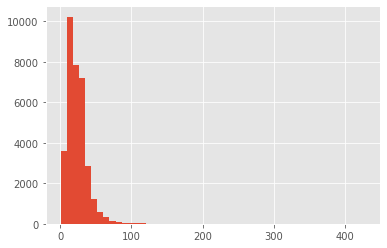

In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
plt.hist([len(s) for s in sentences], bins = 50)
plt.show()

In [13]:
max_len = 50
X = [[w[0] for w in s] for s in sentences]
Y = [[w[1] for w in s] for s in sentences]
new_X = []
y_label = []
for k in range(len(X)):
    seq = X[k]
    j = 0
    while(j<len(seq)):
        new_seq = []
        new_y = []
        for i in range(j,j+max_len):
            try:
                new_seq.append(seq[i])
                new_y.append(Y[k][i])
            except:
                new_seq.append("PADword")
                new_y.append('O')
        new_X.append(new_seq)
        y_label.append(new_y)
        j=i+1

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

living_entity_tags = ['ANIMAL','PERSON','GROUP','TITLE']
non_living_entity_tags = ['BOOK','PLACE','WEAPON','SPECIAL_OBJECT','PLANT','CONCEPT','WATER']

#for extraction of entities
tags2index = {}
for tag in tags:
    if tag not in living_entity_tags and tag not in non_living_entity_tags:
        tags2index[tag] = 0
    elif tag in living_entity_tags:
        tags2index[tag] = 1
    else:
        tags2index[tag] = 2
        
# tags2index = {t:i for i,t in enumerate(tags)}
y=[]        
for labels in y_label:
    word_tag = []
    for label in labels:
#         print(label)
        word_tag.append(tags2index[label])
    y.append(np.array(word_tag))
tags2index

{'ANIMAL': 1,
 'BOOK': 2,
 'CONCEPT': 2,
 'GROUP': 1,
 'O': 0,
 'PERSON': 1,
 'PLACE': 2,
 'PLANT': 2,
 'SPECIAL_OBJECT': 2,
 'TITLE': 1,
 'WATER': 2,
 'WEAPON': 2}

In [15]:
y = np.array(y)

In [16]:
y[0], new_X[0]

(array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 ['Om',
  '!',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword',
  'PADword'])

In [17]:
pip install transformers

     |████████████████████████████████| 2.3MB 9.2MB/s 
     |████████████████████████████████| 3.3MB 45.9MB/s 
     |████████████████████████████████| 901kB 52.8MB/s 


In [18]:
len(new_X)

36078

In [19]:
import keras
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import add, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda,concatenate
import seqeval
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [20]:
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1, random_state=2021)
batch_size = 32

In [21]:
from transformers import BertTokenizer
bert = 'bert-large-uncased'

tokenizer = BertTokenizer.from_pretrained(bert, do_lower_case=True, add_special_tokens=True,
                                                max_length=max_len, pad_to_max_length=True)

In [22]:
 def tokenize(sentences, tokenizer):
    input_ids, input_masks, input_segments = [],[],[]
    for i in range(len(sentences)):
      inputs = tokenizer.encode_plus(sentences[i], add_special_tokens=True, max_length=max_len, padding=True, 
                                             return_attention_mask=True, return_token_type_ids=True,truncation=True)
      input_ids.append(inputs['input_ids'])
      input_masks.append(inputs['attention_mask'])
      input_segments.append(inputs['token_type_ids'])        
        
    return np.asarray(input_ids), np.asarray(input_masks), np.asarray(input_segments)


In [23]:
len(X_tr), len(X_te), batch_size,len(X_tr)/batch_size, len(X_te)/batch_size 

(32470, 3608, 32, 1014.6875, 112.75)

In [24]:
X_tr, X_val = X_tr[:914*batch_size], X_tr[-100*batch_size:]
y_tr, y_val = y_tr[:914*batch_size], y_tr[-100*batch_size:]
#y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
#y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

In [25]:
X_tr_in,X_tr_mask,_ = np.array(tokenize(X_tr,tokenizer))
X_val_in,X_val_mask,_ = np.array(tokenize(X_val,tokenizer))
X_te_in,X_te_mask,_ = np.array(tokenize(X_te,tokenizer))
#y_tr_in,y_tr_mask,_ = np.array(tokenize(y_tr,tokenizer))
#y_val_in,y_val_mask,_ = np.array(tokenize(y_val,tokenizer))

In [26]:
from transformers import TFBertModel, BertConfig

In [27]:
config = BertConfig(dropout=0.2, attention_dropout=0.2)
config.output_hidden_states = False
transformer_model = TFBertModel.from_pretrained(bert)

input_ids_in=tf.keras.layers.Input(shape=(max_len,),name='input_token',dtype='int32')
input_masks_in = tf.keras.layers.Input(shape=(max_len,),name='masked_token',dtype='int32')
#input_segments_in = tf.keras.layers.Input(shape=(max_len,),name='segment_token',dtype='int32')

embedding_layer = transformer_model([input_ids_in,input_masks_in])[0]
cls_token = embedding_layer[:,:]
#dense = Dense(786,activation = 'relu')(cls_token)
#x = Bidirectional(LSTM(units=786, return_sequences=True,
#                      recurrent_dropout=0.2, dropout=0.2))(dense)
#x_rnn = Bidirectional(LSTM(units=786, return_sequences=True,
#                          recurrent_dropout=0.2, dropout=0.2) )(x)
#x = add([x, x_rnn])  
#x = Dense(2056,activation='relu')(x)
out = Dense(1024, activation="relu")(cls_token)
out = Dense(3, activation="softmax")(out)
model = Model([input_ids_in,input_masks_in], out)

for layer in model.layers[:3]:
  layer.trainable = False

model.summary()

Some layers from the model checkpoint at bert-large-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-large-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [28]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [29]:
pip install livelossplot

In [30]:
from livelossplot import PlotLossesKeras
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=0, mode='max', baseline=None, restore_best_weights=False)
callbacks = [PlotLossesKeras(),early_stopping]

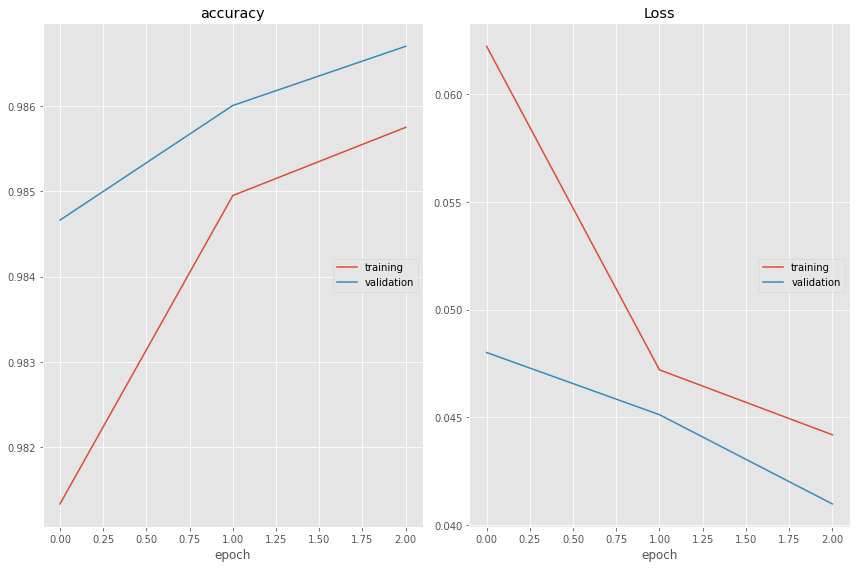

accuracy
	training         	 (min:    0.981, max:    0.986, cur:    0.986)
	validation       	 (min:    0.985, max:    0.987, cur:    0.987)
Loss
	training         	 (min:    0.044, max:    0.062, cur:    0.044)
	validation       	 (min:    0.041, max:    0.048, cur:    0.041)


In [31]:
history = model.fit([X_tr_in,X_tr_mask],y_tr,
                    validation_data=([X_val_in,X_val_mask],y_val),
                    batch_size=batch_size, 
                    epochs=3,
                    callbacks=[callbacks], 
                    verbose=1)

In [32]:
X_te = X_te[:112*batch_size]
y_te = y_te[:112*batch_size]
X_te_in,X_te_mask,_ = np.array(tokenize(X_te,tokenizer))


In [33]:
preds = model.predict([X_te_in,X_te_mask], verbose=1, batch_size=batch_size)

112/112 [==============================] - 43s 362ms/step


In [34]:
# in case of classification
# idx2tag = {i: w for w, i in tags2index.items()}

# in case of extraction of entities
idx2tag = {}
for k,v in tags2index.items():
    if v == 0:
        idx2tag[v] = 'O'
    elif v == 1:
        idx2tag[v] = "LIVING"
    else:
      idx2tag[v] = " NON-LIVING"
        
def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADword", "O"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PADword", "O"))
        out.append(out_i)
    return out

In [35]:
pred_labels = pred2label(preds)

In [36]:
np.array(pred_labels).shape

(3584, 50)

In [37]:
preds.shape

(3584, 50, 3)

In [38]:
y_te.shape

(3584, 50)

In [39]:
test_labels = test2label(y_te)

In [40]:
np.array(test_labels).shape

(3584, 50)

In [41]:
print(classification_report(pred_labels, test_labels))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LIVING seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  NON-LIVING seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


              precision    recall  f1-score   support

       IVING       0.63      0.76      0.69      3208
      LIVING       0.40      0.65      0.49       382

   micro avg       0.60      0.75      0.67      3590
   macro avg       0.52      0.70      0.59      3590
weighted avg       0.61      0.75      0.67      3590



In [42]:
print(f1_score(pred_labels, test_labels,average='micro'))

/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: LIVING seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.7/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  NON-LIVING seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))


0.6669973955103559
